# 1. Check Dataset

### A. Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join


### B. Check if the .environ is working
from os.path import isfile, join

In [4]:
# We created an line in .env that is called 'image_folder' with the path of the file and print
# it in order to ceheck if it is working for us

os.environ['IMAGE_FOLDER']

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final'

### C. Build X and y 
os.environ['IMAGE_FOLDER']
#print(os.environ)

In [3]:
#We named the 'Image_folder' as 'image_dir' and like that it could be easier to call it
image_dir = os.environ['IMAGE_FOLDER']

#Created this in order to recover all our downloaded images on the IMAGE_FOLDER
image_files = []
for f in listdir(image_dir):
    print(f)
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

#We considered that our input X will be the images that we downloaded and the 'y' will be
# the classification "stars or galaxy"
X_list = []
y_list = []
print(image_files)
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg
1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg
1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg
1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg
1237666301632512172_57.5976223070929_0.822063361286141_GALAXY_0.1848572.jpg
1237680275797901779_2.92129873999653_26.7423939900832_GALAXY_0.350847.jpg
1237663782598148618_25.9370141980074_-1.22368504381066_GALAXY_0.2391574.jpg
1237680246816637360_5.46604500701631_20.3671261289832_GALAXY_0.6223869.jpg
1237659154224579580_258.073424808874_23.2493670116733_STAR_-0.0003176941.jpg
1237653652374814984_7.09083700083437_15.2762710357545_GALAXY_0.2505086.jpg
1237680299419763284_338.218180

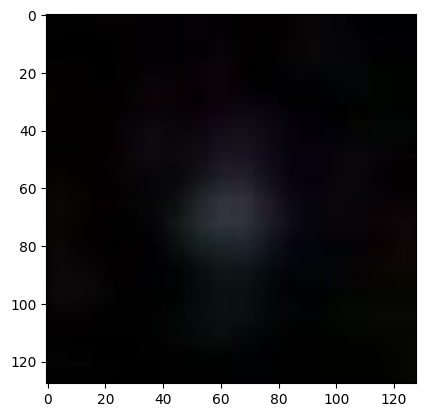

In [4]:
#Plot an image in order to check that our code was working and we had the correct images
plt.imshow(X_data[3])

In [5]:
#As the catergory star and galaxy was on a text version on the file we had to replace it
# by numbers 0 and 1.

y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat

0       1
1       0
2       1
3       0
4       0
       ..
4837    0
4838    0
4839    0
4840    1
4841    0
Length: 4842, dtype: int64

### D. Split our dataset

In [6]:
#As mentioned before, our X will be our downloaded images
X = X_data
#We will use the function we had above and name it 'y'
y = y_data_cat

#Split the dataset and add a stratify argument/parameter, which asks whether you want to
# retain the same proportion of classes in the train and test sets that are found in the
# entire original dataset. For example, if there are 100 observations in the entire original
# dataset of which 80 are class 𝑎and 20 are class 𝑏 and you set stratify = True, with a .7 : .3
# train-test split, you will get a training set with 56 examples of class 𝑎and 14 examples of
# class 𝑏.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [7]:
#Once we split our dataset, we will check the shape and realise if our output is coherent or
# not with our dataset

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3873, 128, 128, 3), (969, 128, 128, 3), (3873,), (969,))

# 1. The Convolutional Neural Network 

We will create our first model called "model_1", this will be our departure point. 

### A. Architecture and compilation of a CNN

In [8]:
#Create our first test model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [11]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.8585 - loss: 1.4287 - mae: 0.2006 - mse: 0.1243 - precision: 0.8733 - recall: 0.8968 - val_accuracy: 0.9290 - val_loss: 0.3185 - val_mae: 0.2122 - val_mse: 0.0891 - val_precision: 0.9193 - val_recall: 0.9652
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9248 - loss: 0.3381 - mae: 0.1664 - mse: 0.0770 - precision: 0.9285 - recall: 0.9474 - val_accuracy: 0.9084 - val_loss: 0.2971 - val_mae: 0.1782 - val_mse: 0.0797 - val_precision: 0.8945 - val_recall: 0.9587
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9292 - loss: 0.2960 - mae: 0.1511 - mse: 0.0695 - precision: 0.9303 - recall: 0.9569 - val_accuracy: 0.9277 - val_loss: 0.2269 - val_mae: 0.1406 - val_mse: 0.0596 - val_precision: 0.9122 - val_recall: 0.9717
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9267 - loss: 0.2688 - mae: 0.1446 - mse: 0.0693 - precision: 0.9232 - recall: 0.9600 - val_accuracy: 

In [12]:
#model_1.save('../models/to-infinity-beyond.model.01.keras')

### C. Evaluate model's performance

In [13]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8901 - loss: 0.3412 - mae: 0.1495 - mse: 0.0900 - precision: 0.8892 - recall: 0.9371


[0.2869589924812317,
 0.9102166891098022,
 0.9591836929321289,
 0.89952152967453,
 0.13312283158302307,
 0.07504366338253021]

### D. Plot loss and accuracy

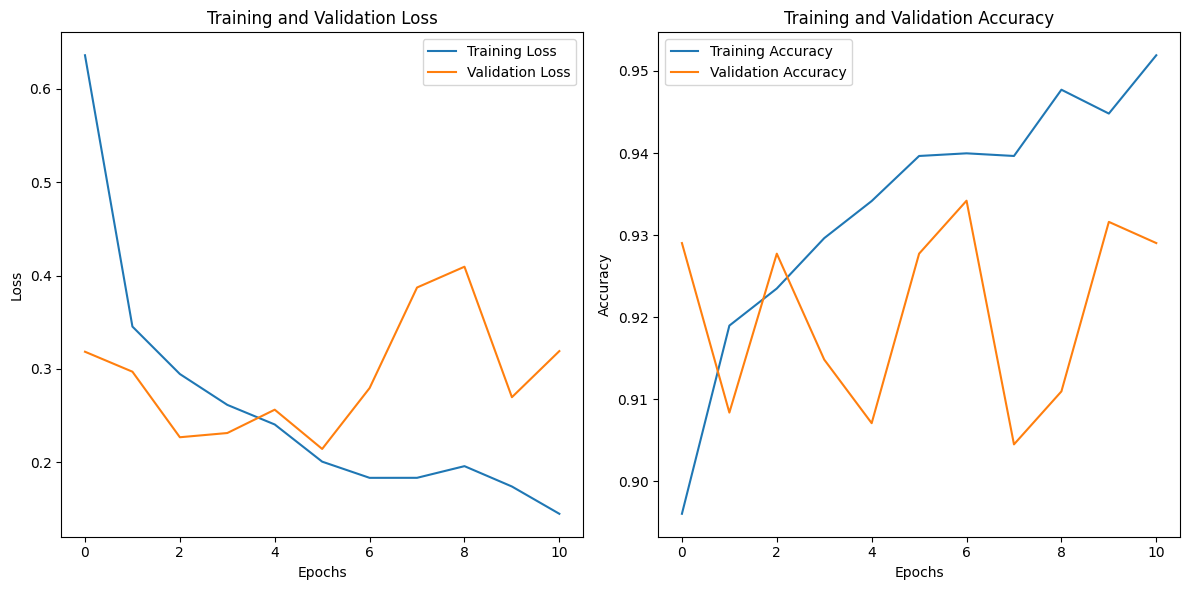

In [14]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Seems a promising model so we will keep it in order to test it against the best other.

# 2. The Convolutional Neural Network - part 2 

We will create 4 other models, and chose one between them to comparte it agains model_1.

In [15]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5: Added 2 dropout.
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6005 - loss: 3.4754 - mae: 0.4775 - mse: 0.2620 - precision: 0.6233 - recall: 0.9320 - val_accuracy: 0.5935 - val_loss: 0.6860 - val_mae: 0.4960 - val_mse: 0.2464 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.6074 - loss: 0.6831 - mae: 0.4942 - mse: 0.2450 - precision: 0.6074 - recall: 1.0000 - val_accuracy: 0.5935 - val_loss: 0.6806 - val_mae: 0.4918 - val_mse: 0.2437 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.6206 - loss: 0.6743 - mae: 0.4881 - mse: 0.2406 - precision: 0.6206 - recall: 1.0000 - val_accuracy: 0.5935 - val_loss: 0.6776 - val_mae: 0.4885 - val_mse: 0.2423 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.6137 - loss: 0.6719 - mae: 0.4850 - mse: 0.2394 - precision: 0.6137 - recall: 1.

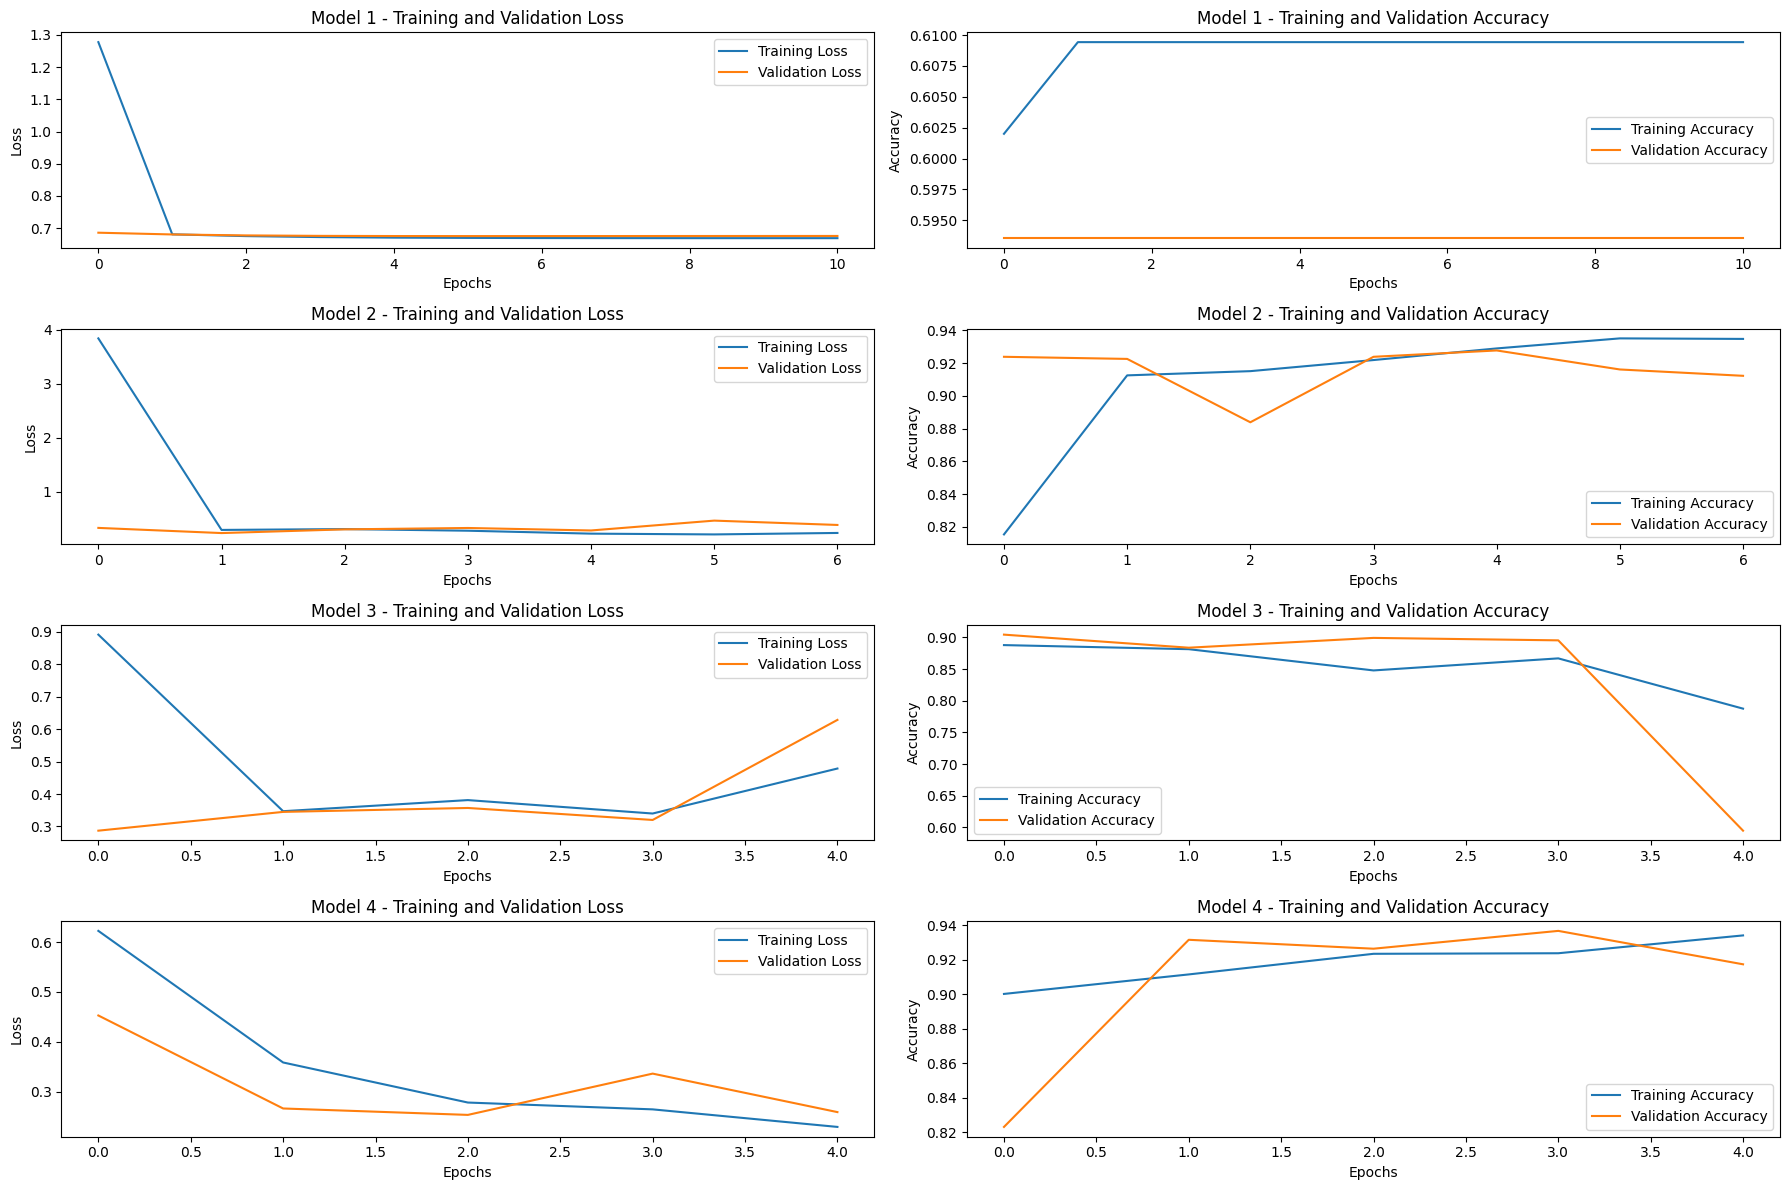

In [18]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

### We will take the second model plotted on the graph which looks better than all the others

In [19]:
y_train.value_counts()/len(y_train)

1    0.606248
0    0.393752
Name: count, dtype: float64

## Comparison between our "model_1" and "model_3"

In [20]:
from space_agent.interface.interface_main import create_rotated_images, copy_images_sorted

In [21]:
create_rotated_images()
copy_images_sorted()

index: 0 - rc: 0 - RAS
index: 1 - rc: 0 - RAS
index: 2 - rc: 0 - RAS
index: 3 - rc: 0 - RAS
index: 4 - rc: 0 - RAS
index: 5 - rc: 0 - RAS
index: 6 - rc: 0 - RAS
index: 7 - rc: 0 - RAS
index: 8 - rc: 0 - RAS
index: 9 - rc: 0 - RAS
index: 10 - rc: 0 - RAS
index: 11 - rc: 0 - RAS
index: 12 - rc: 0 - RAS
index: 13 - rc: 0 - RAS
index: 14 - rc: 0 - RAS
index: 15 - rc: 0 - RAS
index: 16 - rc: 0 - RAS
index: 17 - rc: 0 - RAS
index: 18 - rc: 0 - RAS
index: 19 - rc: 0 - RAS
index: 20 - rc: 0 - RAS
index: 21 - rc: 0 - RAS
index: 22 - rc: 0 - RAS
index: 23 - rc: 0 - RAS
index: 24 - rc: 0 - RAS
index: 25 - rc: 0 - RAS
index: 26 - rc: 0 - RAS
index: 27 - rc: 0 - RAS
index: 28 - rc: 0 - RAS
index: 29 - rc: 0 - RAS
index: 30 - rc: 0 - RAS
index: 31 - rc: 0 - RAS
index: 32 - rc: 0 - RAS
index: 33 - rc: 0 - RAS
index: 34 - rc: 0 - RAS
index: 35 - rc: 0 - RAS
index: 36 - rc: 0 - RAS
index: 37 - rc: 0 - RAS
index: 38 - rc: 0 - RAS
index: 39 - rc: 0 - RAS
index: 40 - rc: 0 - RAS
index: 41 - rc: 0 - RAS
in

### Retrieve information about images

In [22]:
import os
import shutil
import random
def generate_balanced_dataset(galaxy_dir, star_dir, galaxy_aug_dir, star_aug_dir, balanced_dir):
    # Ensure the balanced directory exists
    if not os.path.exists(balanced_dir):
        os.makedirs(balanced_dir)
    # Get the list of files in each directory
    galaxy_files = os.listdir(galaxy_dir)
    star_files = os.listdir(star_dir)
    galaxy_aug_files = os.listdir(galaxy_aug_dir)
    star_aug_files = os.listdir(star_aug_dir)
    # Count the number of images in each directory
    galaxy_count = len(galaxy_files)
    star_count = len(star_files)
    galaxy_aug_count = len(galaxy_aug_files)
    star_aug_count = len(star_aug_files)
    # Copy all original images to the balanced directory
    for file in galaxy_files:
        shutil.copy(os.path.join(galaxy_dir, file), balanced_dir)
    for file in star_files:
        shutil.copy(os.path.join(star_dir, file), balanced_dir)
    if galaxy_aug_count > star_aug_count:
        # Copy all star augmented images to the balanced directory
        for file in star_aug_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)
        # Copy star_aug_count - (galaxy_count - star_count) galaxy augmented images to the balanced directory
        additional_files = random.sample(galaxy_aug_files, star_aug_count - (galaxy_count - star_count))
        for file in additional_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
    else:
        # Copy all galaxy augmented images to the balanced directory
        for file in galaxy_aug_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
        # Copy galaxy_aug_count - (star_count - galaxy_count) star augmented images to the balanced directory
        additional_files = random.sample(star_aug_files, galaxy_aug_count - (star_count - galaxy_count))
        for file in additional_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)

In [23]:
generate_balanced_dataset(
    "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sorted/GALAXY", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sorted/STAR", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_from_augmentation/GALAXY", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_from_augmentation/STAR", "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final")

Last try with 2 models (the first one and the model_3) using the augmented images

In [24]:
#Model r2d2: Further increase neurons in the Dense layer
model_r2d2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model c3po: Further increase neurons in the Dense layer
model_c3po = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
# Compile the models
models = [model_r2d2, model_c3po]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.8340 - loss: 2.6134 - mae: 0.2036 - mse: 0.1328 - precision: 0.8412 - recall: 0.8989 - val_accuracy: 0.9174 - val_loss: 0.2760 - val_mae: 0.1707 - val_mse: 0.0713 - val_precision: 0.8960 - val_recall: 0.9739
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9076 - loss: 0.3096 - mae: 0.1775 - mse: 0.0817 - precision: 0.8926 - recall: 0.9666 - val_accuracy: 0.8787 - val_loss: 0.3706 - val_mae: 0.1385 - val_mse: 0.0811 - val_precision: 0.8401 - val_recall: 0.9826
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7626 - loss: 0.4186 - mae: 0.2483 - mse: 0.1239 - precision: 0.7316 - recall: 0.9856 - val_accuracy: 0.5935 - val_loss: 0.5128 - val_mae: 0.3175 - val_mse: 0.1537 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8517 - loss: 0.4603 - mae: 0.2914 - mse: 0.1402 - precision: 0.8505 - recall: 0.

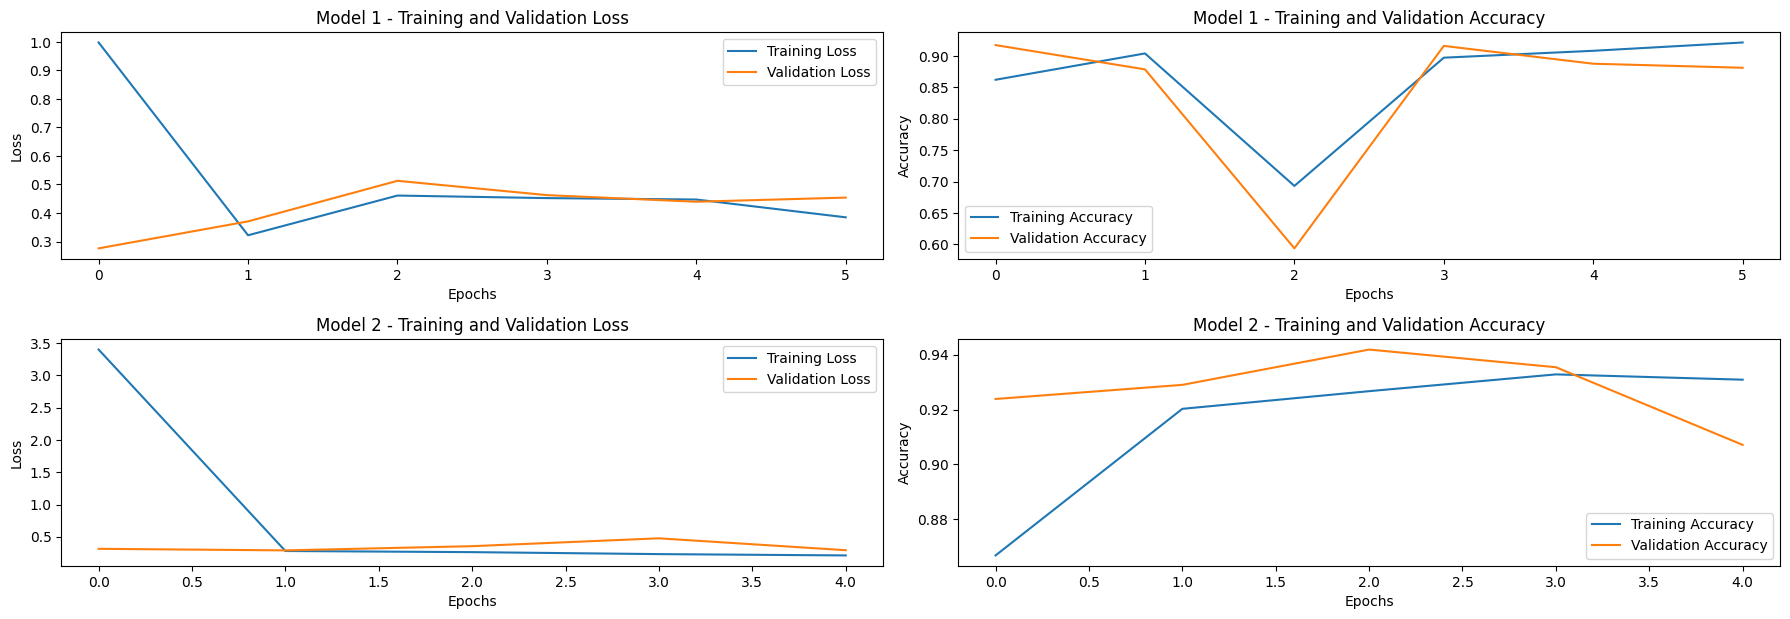

In [27]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [28]:
model_r2d2.save('../models/to-infinity-beyond.model.r2d2.keras')

# CNN REDSHIFT

For the redshift model, we created a new folder... called 'IMAGE_FINAL' which will 

In [5]:
os.environ['IMAGE_FINAL']

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final'

In [56]:
image_dir = os.environ['IMAGE_FINAL']


image_files = []
for f in listdir(image_dir):
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []

y_list_rs = []
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat_rs = image_info[4]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list_rs.append(cat_rs)

print(y_list_rs)
X_data = np.array(X_list)
print(X_data.shape)
y_data_rs = np.array(y_list_rs)
print(y_data_rs.shape)

not jpg ignored
['1.010923', '1.040037', '0.2860934', '-0.0001686188', '0.09963445', '1.209123', '7.566335E-05', '0.07972629', '0.5066113', '0.6665187', '0.0004263824', '2.082755', '2.225737', '0.0004075449', '0.5190644', '0.0003305929', '0.0001422011', '-8.090883E-05', '1.066125', '0.5281535', '2.701146', '0.7552643', '0.7336797', '0.5103259', '0.5939884', '0.6226482', '1.166883', '0.0003134053', '0.07020438', '0.5050672', '0.4801632', '0.4869024', '0.1728631', '1.72023', '0.0001422011', '0.1390517', '0.1655436', '0.5896075', '0.1424896', '2.767038', '1.018138', '0.1415183', '0.08869503', '0.1848572', '0.350847', '0.3038332', '0.2391574', '1.512483', '-0.001506516', '0.6223869', '0.1390098', '0.1351734', '-0.0003176941', '0.669324', '0.09023475', '0.2505086', '0.6185887', '0.956165', '0.3351592', '2.914261', '0.7328814', '2.069323', '0.2219528', '0.628804', '0.0922523', '0.1724996', '1.134754', '1.095877', '0.5601146', '0.584038', '0.0001266983', '0.7353958', '0', '-0.001087446', '0.2

In [57]:
X_data.shape

(18935, 128, 128, 3)

In [58]:
# Split the dataset
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_data,y_data_rs,
                                                    test_size=0.3,
                                                    random_state=42)

In [59]:
#Baseline
y_train_rs.astype(float).mean()

0.61688334783821

In [60]:
#Models
model_rs_1 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='linear')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Compile the models
models_rs = [model_rs_1, model_rs_2, model_rs_3, model_rs_4, model_rs_5]
for i, model_rs in enumerate(models_rs, start=1):
    model_rs.compile(optimizer='adamax',
                  loss='mse',
                  metrics=['mae', 'mse','r2_score'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.
Model 5 compiled.


In [63]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=2, restore_best_weights = True)

# Placeholder for storing histories
histories_rs = []

for i, model_rs in enumerate(models_rs, start=1):
    print(f"Training Model {i}...")
    history_rs = model_rs.fit(X_train_rs,y_train_rs.astype(float),
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2,
                        callbacks=[es])
    histories_rs.append(history_rs)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 38s 114ms/step - loss: 1.0272 - mae: 0.6363 - mse: 1.0272 - r2_score: -0.6513 - val_loss: 0.9977 - val_mae: 0.6181 - val_mse: 0.9977 - val_r2_score: -0.6184
Epoch 2/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 37s 112ms/step - loss: 0.9696 - mae: 0.6100 - mse: 0.9696 - r2_score: -0.6207 - val_loss: 0.9958 - val_mae: 0.6172 - val_mse: 0.9958 - val_r2_score: -0.6153
Epoch 3/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 37s 110ms/step - loss: 1.0068 - mae: 0.6232 - mse: 1.0068 - r2_score: -0.6244 - val_loss: 0.9931 - val_mae: 0.6159 - val_mse: 0.9931 - val_r2_score: -0.6110
Epoch 4/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 38s 116ms/step - loss: 0.9752 - mae: 0.6130 - mse: 0.9752 - r2_score: -0.6209 - val_loss: 0.9895 - val_mae: 0.6141 - val_mse: 0.9895 - val_r2_score: -0.6050
Epoch 5/10
332/332 ━━━━━━━━━━━━━━━━━━━━ 36s 109ms/step - loss: 0.9839 - mae: 0.6155 - mse: 0.9839 - r2_score: -0.6157 - val_loss: 0.9844 - val_mae: 0.6117 - val_mse: 0.9844 - val_r2_score: -0.

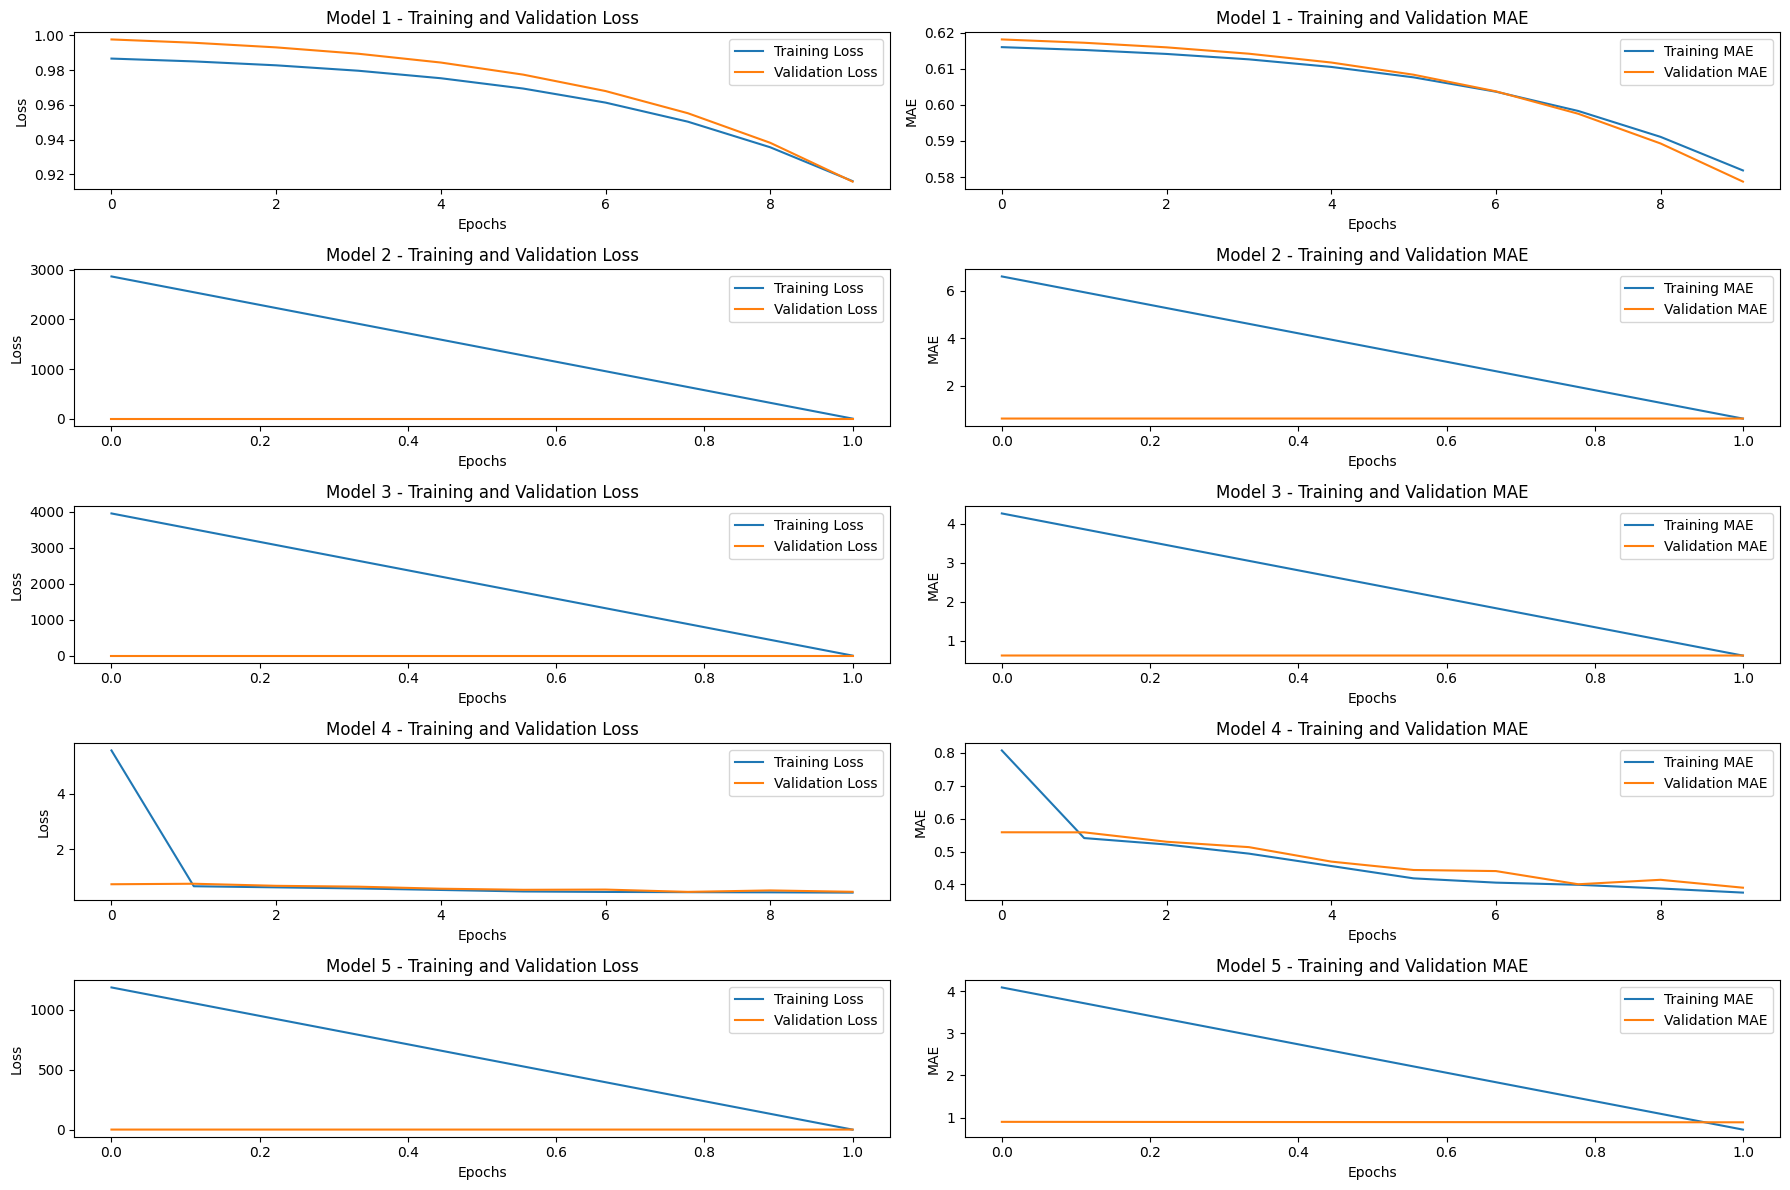

In [64]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history_rs in enumerate(histories_rs, start=1):
    plt.subplot(5, 2, i * 2 - 1)
    plt.plot(history_rs.history['loss'], label='Training Loss')
    plt.plot(history_rs.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(5, 2, i * 2)
    plt.plot(history_rs.history['mae'], label='Training MAE')
    plt.plot(history_rs.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Model {i} - Training and Validation MAE')
    plt.legend()

plt.tight_layout()
plt.show()

Second test - wish me luck